In [ ]:
#Tarea 4, Simulación de Sistemas Físicos

In [ ]:
def horner_modified(n, x):
    acc = x  # Asumiendo que f(1) = x
    for i in range(2, n + 1):
        acc = acc * (x / i)
    return acc

# Ejemplo
n = 5
x = 3
resultado = horner_modified(5, 3)
print(f"El resultado de f({5}) con x = {3} es: {Resultado}")

El resultado de f(5) con x = 3 es: 2.025


In [ ]:
import math

def horner(x, terms=10):
    # Coeficientes de la serie de Taylor, cos(x)
    coeffs = [((-1)**n) / math.factorial(2*n) for n in range(terms)]

    # Evaluación del polinomio
    acc = 0
    for c in reversed(coeffs):
        acc = acc * (x**2) + c
    return acc

# Ejemplo
x = math.pi / 3  # Evaluando cos(pi/3)
resultado = horner(x)
print(f"El valor aproximado de cos({x}) es: {resultado}")


El valor aproximado de cos(1.0471975511965976) es: 0.5000000000000001


In [ ]:
import math
import pandas as pd

# Función para evaluar cos(x) usando la serie de Taylor usando Horner
def horner_cosine(x, tol):
    acc = 0
    error_relativo = 1
    iteracion = 0
    coef = 1  # c_0 = 1
    while error_relativo > tol:
        acc += coef
        iteracion += 1
        coef *= -x**2 / ((2 * iteracion - 1) * (2 * iteracion))
        error_relativo = abs((acc - math.cos(x)) / math.cos(x))
        yield iteracion, acc, error_relativo

# Función para evaluar f(n) = f(n-1) * (x/n) usando Horner
def horner_fn(n, x, tol):
    acc = x
    iteracion = 1
    error_relativo = abs((acc - math.cos(x)) / math.cos(x))  # tomamos cos(x) como referencia
    while error_relativo > tol and iteracion < n:
        iteracion += 1
        acc = acc * (x / iteracion)
        error_relativo = abs((acc - math.cos(x)) / math.cos(x))
        yield iteracion, acc, error_relativo

# Función para generar la tabla de resultados
def generar_tabla(x, n, tol, funcion_horner, nombre_funcion):
    resultados = []
    for iteracion, suma, error_relativo in funcion_horner(x, tol):
        resultados.append({
            "x": x,
            "Iteración": iteracion,
            "Suma": suma,
            f"|Suma - cos(x)| / cos(x)": error_relativo
        })
    return pd.DataFrame(resultados)

# Ejemplo para cos(x) y f(n)
x_valores = [math.pi / 3, 100]  # Valores de x para probar (uno pequeño, otro grande)
n = 20  # Número máximo de iteraciones
tolerancias = [1e-4, 1e-8]  # Tolerancias

# Generamos las tablas
for tol in tolerancias:
    print(f"\nTolerancia: {tol}\n")

    for x in x_valores:
        print(f"Valor de x: {x}\n")

        # cos(x)
        tabla_cos = generar_tabla(x, n, tol, horner_cosine, "cos(x)")
        print("Tabla de convergencia para cos(x):")
        print(tabla_cos.to_string(index=False))

        # f(n)
        tabla_fn = generar_tabla(x, n, tol, lambda x, tol: horner_fn(n, x, tol), "f(n)")
        print("\nTabla de convergencia para f(n):")
        print(tabla_fn.to_string(index=False))
        print("\n")



Tolerancia: 0.0001

Valor de x: 1.0471975511965976

Tabla de convergencia para cos(x):
       x  Iteración     Suma  |Suma - cos(x)| / cos(x)
1.047198          1 1.000000                  1.000000
1.047198          2 0.451689                  0.096623
1.047198          3 0.501796                  0.003592
1.047198          4 0.499965                  0.000071

Tabla de convergencia para f(n):
       x  Iteración         Suma  |Suma - cos(x)| / cos(x)
1.047198          2 5.483114e-01                  0.096623
1.047198          3 1.913968e-01                  0.617206
1.047198          4 5.010756e-02                  0.899785
1.047198          5 1.049450e-02                  0.979011
1.047198          6 1.831636e-03                  0.996337
1.047198          7 2.740121e-04                  0.999452
1.047198          8 3.586810e-05                  0.999928
1.047198          9 4.173443e-06                  0.999992
1.047198         10 4.370420e-07                  0.999999
1.047198     

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = np.loadtxt('stars.dat')

# Asumiendo que las columnas del archivo son: temperatura (T), magnitud (M)
temperatura = data[:, 0]
magnitud = data[:, 1]

# Crear el HR diagram utilizando matplotlib directamente
plt.figure()
plt.scatter(temperatura, magnitud, c='blue', s=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Magnitud')
plt.title('Diagrama de Hertzsprung-Russell (HR)')
plt.gca().invert_xaxis()  # Las temperaturas se invierten en el eje X
plt.gca().invert_yaxis()  # Las magnitudes se invierten en el eje Y
plt.show()


FileNotFoundError: stars.dat not found.

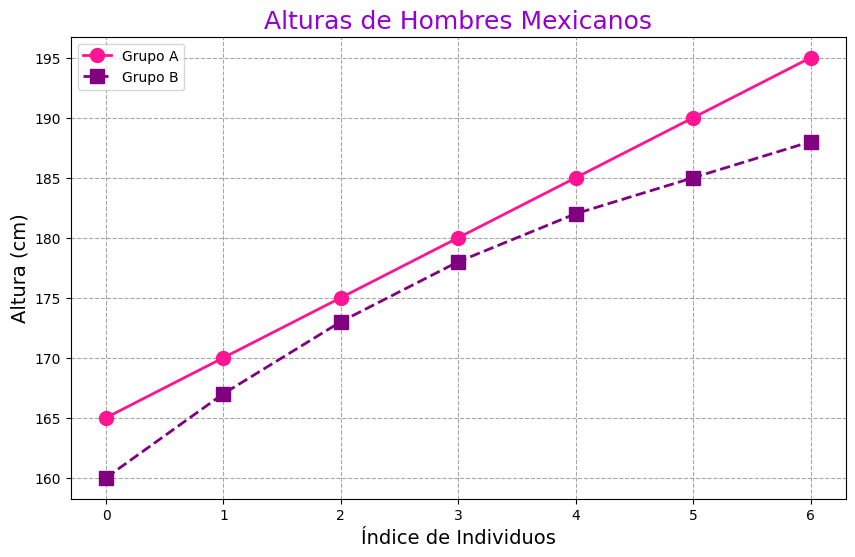

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo: alturas de hombres mexicanos (en cm)
A = [165, 170, 175, 180, 185, 190, 195]
B = [160, 167, 173, 178, 182, 185, 188]

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar los datos
plt.plot(A, 'o-', color='deeppink', label='Grupo A', markersize=10, linewidth=2)
plt.plot(B, 's--', color='purple', label='Grupo B', markersize=10, linewidth=2)

# Añadir títulos y etiquetas
plt.title('Alturas de Hombres Mexicanos', fontsize=18, color='darkviolet')
plt.xlabel('Índice de Individuos', fontsize=14)
plt.ylabel('Altura (cm)', fontsize=14)

# Mostrar leyenda
plt.legend()

# Mejorar la apariencia de la cuadrícula
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Mostrar la gráfica
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def leer_datos(nombre_archivo):
    datos = []
    with open(nombre_archivo, 'r') as archivo:
        for linea in archivo:
            # Intentar convertir la línea a float, ignorar errores
            try:
                valor = float(linea.strip())
                datos.append(valor)
            except ValueError:
                # Ignorar líneas que no se pueden convertir a float
                pass
    return datos

# Leer los datos desde los archivos
A = leer_datos('altura5.dat')
B = leer_datos('altura6.dat')

# Imprimir los datos para verificar
print("Datos de A:", A)
print("Datos de B:", B)

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar los datos
plt.plot(A, 'o-', color='deeppink', label='Grupo A', markersize=10, linewidth=2)
plt.plot(B, 's--', color='purple', label='Grupo B', markersize=10, linewidth=2)

# Añadir títulos y etiquetas
plt.title('Alturas de Hombres Mexicanos', fontsize=18, color='darkviolet')
plt.xlabel('Índice de Individuos', fontsize=14)
plt.ylabel('Altura (cm)', fontsize=14)

# Mostrar leyenda
plt.legend()

# Mejorar la apariencia de la cuadrícula
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Mostrar la gráfica
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'altura5.dat'

In [ ]:
#### 2da Tarea

In [ ]:
import numpy as np

# Def la función a integrar
def integrand(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Función para aplicar la regla del trapecio
def trapezoidal_rule(a, b, n, func):
    x = np.linspace(a, b, n+1)
    y = func(x)
    h = (b - a) / n
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Intervalo de integración
a = -1
b = 1

# Número de subintervalos
n1 = 6
n2 = 15
n3 = 30  # Añadido para una mejor estimación del error

# Calculamos la integral con 6, 15 y 30 subintervalos
integral_6 = trapezoidal_rule(a, b, n1, integrand)
integral_15 = trapezoidal_rule(a, b, n2, integrand)
integral_30 = trapezoidal_rule(a, b, n3, integrand)

# Estimarmos el error
error_estimado_15_vs_30 = abs(integral_30 - integral_15) / 15

print(f'Integral con 6 subintervalos: {integral_6}')
print(f'Integral con 15 subintervalos: {integral_15}')
print(f'Integral con 30 subintervalos: {integral_30}')
print(f'Error estimado entre 15 y 30 subintervalos: {error_estimado_15_vs_30}')


Integral con 6 subintervalos: 0.6781918237837556
Integral con 15 subintervalos: 0.6819721164424767
Integral con 30 subintervalos: 0.6825102280012203
Error estimado entre 15 y 30 subintervalos: 3.587410391624098e-05


In [ ]:
import numpy as np

# Def la función
def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# la regla de Simpson
def simpson(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("El número de particiones n debe ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    fx = f(x)

    # Aplicamos la fórmula de Simpson
    integral = fx[0] + fx[-1] + 4 * sum(fx[1:n:2]) + 2 * sum(fx[2:n-1:2])
    integral *= h / 3

    return integral

# Calculamos la integral con 6, 16 y 30 particiones
integral_6_particiones = simpson(f, -1, 1, 6)
integral_16_particiones = simpson(f, -1, 1, 16)  # Cambiado a 16
integral_30_particiones = simpson(f, -1, 1, 30)

# Estimamos el error
error_estimado = abs(integral_30_particiones - integral_16_particiones) / 15

print("Integral con 6 particiones:", integral_6_particiones)
print("Integral con 16 particiones:", integral_16_particiones)
print("Integral con 30 particiones:", integral_30_particiones)
print("Error estimado entre 16 y 30 particiones:", error_estimado)


Integral con 6 particiones: 0.6827586139549787
Integral con 16 particiones: 0.6826908122781858
Integral con 30 particiones: 0.682689598520802
Error estimado entre 16 y 30 particiones: 8.091715892148225e-08


In [ ]:
#### C) Gauss-Legendre, 15 Puntos.

In [ ]:
import numpy as np
from scipy.special import roots_legendre

# Def la función a integrar
def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Implementamos la integración con Gauss-Legendre
def gauss_legendre(f, a, b, n):
    # Obtenemos los puntos y los pesos de Gauss-Legendre
    puntos, pesos = roots_legendre(n)

    # Cambiamos los puntos al intervalo [a, b]
    puntos_mapeados = 0.5 * (b - a) * puntos + 0.5 * (a + b)

    # Calculamos la integral
    integral = 0.5 * (b - a) * np.sum(pesos * f(puntos_mapeados))

    return integral

# Calculamos la integral con 6, 15, y una aproximación de referencia con 50 puntos
integral_6_puntos = gauss_legendre(f, -1, 1, 6)
integral_15_puntos = gauss_legendre(f, -1, 1, 15)
integral_50_puntos = gauss_legendre(f, -1, 1, 50)  # Aproximación más precisa

# Estimamos el error
error_6_puntos = abs(integral_50_puntos - integral_6_puntos)
error_15_puntos = abs(integral_50_puntos - integral_15_puntos)

print("Integral con 6 puntos:", integral_6_puntos)
print("Integral con 15 puntos:", integral_15_puntos)
print("Integral de referencia (50 puntos):", integral_50_puntos)
print("Error con 6 puntos:", error_6_puntos)
print("Error con 15 puntos:", error_15_puntos)


Integral con 6 puntos: 0.6826894870533857
Integral con 15 puntos: 0.6826894921370861
Integral de referencia (50 puntos): 0.6826894921370865
Error con 6 puntos: 5.08370079366216e-09
Error con 15 puntos: 4.440892098500626e-16


In [ ]:
#### 2.- Integración numérica. a) usando regla del trapecio y con 6, 15, 20 subs.


In [ ]:
import numpy as np

# Def la función a integrar
def integrand(x):
    return (np.exp(x) * np.sin(x)) / (1 + x**2)

# Función para aplicar la regla del trapecio
def trapezoidal_rule(a, b, n, func):
    x = np.linspace(a, b, n+1)
    y = func(x)
    h = (b - a) / n
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Intervalo de integración
a = 0
b = 3

# Número de subintervalos
n1 = 6
n2 = 15
n3 = 20

# Calculamos la integral con 6, 15 y 20 subintervalos
integral_6 = trapezoidal_rule(a, b, n1, integrand)
integral_15 = trapezoidal_rule(a, b, n2, integrand)
integral_20 = trapezoidal_rule(a, b, n3, integrand)

# Estimamos el error
error_estimado_15_vs_20 = abs(integral_20 - integral_15) / 15
error_estimado_6_vs_15 = abs(integral_15 - integral_6) / 9  # Error estimado entre 6 y 15 subintervalos

print(f'Integral con 6 subintervalos: {integral_6}')
print(f'Integral con 15 subintervalos: {integral_15}')
print(f'Integral con 20 subintervalos: {integral_20}')
print(f'Error estimado entre 15 y 20 subintervalos: {error_estimado_15_vs_20}')
print(f'Error estimado entre 6 y 15 subintervalos: {error_estimado_6_vs_15}')


Integral con 6 subintervalos: 2.821344182720175
Integral con 15 subintervalos: 2.8720451041504567
Integral con 20 subintervalos: 2.8762438146076046
Error estimado entre 15 y 20 subintervalos: 0.00027991403047652834
Error estimado entre 6 y 15 subintervalos: 0.005633435714475758


In [ ]:
### b) Simpson, 6, 15, 20 partes.

In [ ]:
import numpy as np

# Def la función a integrar
def integrand(x):
    return (np.exp(x) * np.sin(x)) / (1 + x**2)

# Función para aplicar la regla de Simpson
def simpson_rule(a, b, n, func):
    if n % 2 == 1:
        raise ValueError("El número de particiones n debe ser par.")

    x = np.linspace(a, b, n + 1)
    y = func(x)
    h = (b - a) / n
    integral = (y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2])) * h / 3
    return integral

# Intervalo de integración
a = 0
b = 3

# Número de particiones
n1 = 6
n2 = 14  # Ajustado a 14 ya que 15 no es par
n3 = 20

# Calcular la integral con 6, 14 y 20 particiones
integral_6 = simpson_rule(a, b, n1, integrand)
integral_14 = simpson_rule(a, b, n2, integrand)
integral_20 = simpson_rule(a, b, n3, integrand)

# Estimar el error
error_estimado_14_vs_20 = abs(integral_20 - integral_14) / 14
error_estimado_6_vs_14 = abs(integral_14 - integral_6) / 8  # Error estimado entre 6 y 14 particiones

print(f'Integral con 6 particiones: {integral_6}')
print(f'Integral con 14 particiones: {integral_14}')
print(f'Integral con 20 particiones: {integral_20}')
print(f'Error estimado entre 14 y 20 particiones: {error_estimado_14_vs_20}')
print(f'Error estimado entre 6 y 14 particiones: {error_estimado_6_vs_14}')


Integral con 6 particiones: 2.885401863727093
Integral con 14 particiones: 2.881688431185657
Integral con 20 particiones: 2.881648560171607
Error estimado entre 14 y 20 particiones: 2.8479295749926436e-06
Error estimado entre 6 y 14 particiones: 0.00046417906767948214


In [ ]:
## c) con Gauss-Legendre con 6, 15

In [ ]:
import numpy as np
from scipy.special import roots_legendre

# Def la función a integrar
def integrand(x):
    return (np.exp(x) * np.sin(x)) / (1 + x**2)

# Función para calcular la integral usando Gauss-Legendre
def gauss_legendre_integration(a, b, n, func):
    # Obtener los puntos y pesos
    points, weights = roots_legendre(n)

    # Transformar los puntos y pesos al intervalo [a, b]
    transformed_points = 0.5 * (points + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights

    # Evaluamos la función en los puntos transformados
    function_values = func(transformed_points)

    # Calculamos la integral
    integral = np.sum(transformed_weights * function_values)
    return integral

# Intervalo de integración
a = 0
b = 3

# Número de puntos para Gauss-Legendre
n1 = 6
n2 = 15

# Calcular la integral con 6 y 15 puntos de Gauss-Legendre
integral_6 = gauss_legendre_integration(a, b, n1, integrand)
integral_15 = gauss_legendre_integration(a, b, n2, integrand)

# Estimar el error
# La estimación del error se puede calcular como la diferencia entre los resultados

print(f'Integral con 6 puntos de Gauss-Legendre: {integral_6}')
print(f'Integral con 15 puntos de Gauss-Legendre: {integral_15}')

# Estimar el error (simple diferencia entre 6 y 15 puntos)
error_estimado = abs(integral_15 - integral_6)
print(f'Error estimado entre 6 y 15 puntos de Gauss-Legendre: {error_estimado}')


Integral con 6 puntos de Gauss-Legendre: 2.88164293779261
Integral con 15 puntos de Gauss-Legendre: 2.8816372730338893
Error estimado entre 6 y 15 puntos de Gauss-Legendre: 5.664758720769214e-06


In [ ]:
###### Parte 3, Repetir el problema 2 considerando los límites en (-2, 0).

In [ ]:
## 1. Regla del trapecio


In [ ]:
import numpy as np

# Definimos la función a integrar
def integrand(x):
    return (np.exp(x) * np.sin(x)) / (1 + x**2)

# Función para aplicar la regla del trapecio
def trapezoidal_rule(a, b, n, func):
    x = np.linspace(a, b, n+1)
    y = func(x)
    h = (b - a) / n
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Intervalo de integración
a = -2
b = 0

# Número de subintervalos
n1 = 6
n2 = 15
n3 = 20

# Calculamos la integral con 6, 15 y 20 subintervalos
integral_6 = trapezoidal_rule(a, b, n1, integrand)
integral_15 = trapezoidal_rule(a, b, n2, integrand)
integral_20 = trapezoidal_rule(a, b, n3, integrand)

# Estimamos el error
error_estimado_15_vs_20 = abs(integral_20 - integral_15) / 15
error_estimado_6_vs_15 = abs(integral_15 - integral_6) / 9  # Error estimado entre 6 y 15 subintervalos

print(f'Integral con 6 subintervalos (Trapecio): {integral_6}')
print(f'Integral con 15 subintervalos (Trapecio): {integral_15}')
print(f'Integral con 20 subintervalos (Trapecio): {integral_20}')
print(f'Error estimado entre 15 y 20 subintervalos (Trapecio): {error_estimado_15_vs_20}')
print(f'Error estimado entre 6 y 15 subintervalos (Trapecio): {error_estimado_6_vs_15}')


Integral con 6 subintervalos (Trapecio): -0.24662685301874357
Integral con 15 subintervalos (Trapecio): -0.2549050624716035
Integral con 20 subintervalos (Trapecio): -0.25559039224119967
Error estimado entre 15 y 20 subintervalos (Trapecio): 4.568865130641179e-05
Error estimado entre 6 y 15 subintervalos (Trapecio): 0.0009198010503177694


In [ ]:
## Método de Simpson


In [ ]:
import numpy as np

# Def la función a integrar
def integrand(x):
    return (np.exp(x) * np.sin(x)) / (1 + x**2)

# Función para aplicar la regla de Simpson
def simpson_rule(a, b, n, func):
    if n % 2 == 1:
        raise ValueError("El número de particiones n debe ser par.")

    x = np.linspace(a, b, n + 1)
    y = func(x)
    h = (b - a) / n
    integral = (y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2])) * h / 3
    return integral

# Intervalo de integración
a = -2
b = 0

# Número de particiones (debe ser par para la regla de Simpson)
n1 = 6
n2 = 14  # Ajustado a 14 ya que 15 no es par
n3 = 20

# Calculamos la integral con 6, 14 y 20 particiones
integral_6 = simpson_rule(a, b, n1, integrand)
integral_14 = simpson_rule(a, b, n2, integrand)
integral_20 = simpson_rule(a, b, n3, integrand)

# Estimamos el error
error_estimado_14_vs_20 = abs(integral_20 - integral_14) / 14
error_estimado_6_vs_14 = abs(integral_14 - integral_6) / 8  # Error estimado entre 6 y 14 particiones

print(f'Integral con 6 particiones (Simpson): {integral_6}')
print(f'Integral con 14 particiones (Simpson): {integral_14}')
print(f'Integral con 20 particiones (Simpson): {integral_20}')
print(f'Error estimado entre 14 y 20 particiones (Simpson): {error_estimado_14_vs_20}')
print(f'Error estimado entre 6 y 14 particiones (Simpson): {error_estimado_6_vs_14}')


Integral con 6 particiones (Simpson): -0.25676180320922154
Integral con 14 particiones (Simpson): -0.25647994712647737
Integral con 20 particiones (Simpson): -0.2564727585363072
Error estimado entre 14 y 20 particiones (Simpson): 5.134707264415577e-07
Error estimado entre 6 y 14 particiones (Simpson): 3.52320103430212e-05


In [ ]:
## Método de Gauss-Legendre


In [ ]:
import numpy as np
from scipy.special import roots_legendre

# Def la función a integrar
def integrand(x):
    return (np.exp(x) * np.sin(x)) / (1 + x**2)

# Función para calcular la integral usando Gauss-Legendre
def gauss_legendre_integration(a, b, n, func):
    # Obtener los puntos y pesos para la cuadratura de Gauss-Legendre
    points, weights = roots_legendre(n)

    # Transformar los puntos y pesos al intervalo [a, b]
    transformed_points = 0.5 * (points + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights

    # Evaluamos la función en los puntos transformados
    function_values = func(transformed_points)

    # Calculamos la integral
    integral = np.sum(transformed_weights * function_values)
    return integral

# Intervalo de integración
a = -2
b = 0

# Número de puntos para Gauss-Legendre
n1 = 6
n2 = 15

# Calculamos la integral con 6 y 15 puntos de Gauss-Legendre
integral_6 = gauss_legendre_integration(a, b, n1, integrand)
integral_15 = gauss_legendre_integration(a, b, n2, integrand)

# Estimamos el error

print(f'Integral con 6 puntos de Gauss-Legendre: {integral_6}')
print(f'Integral con 15 puntos de Gauss-Legendre: {integral_15}')

# Estimamos el error (simple diferencia entre 6 y 15 puntos)
error_estimado = abs(integral_15 - integral_6)
print(f'Error estimado entre 6 y 15 puntos de Gauss-Legendre: {error_estimado}')


Integral con 6 puntos de Gauss-Legendre: -0.2564723282471043
Integral con 15 puntos de Gauss-Legendre: -0.2564705673360428
Error estimado entre 6 y 15 puntos de Gauss-Legendre: 1.7609110615213197e-06


In [ ]:
#### Parte 4.- Integración numérica (también usando Gauss-Legendre)


In [ ]:
import numpy as np
from scipy.special import roots_legendre

# Def las funciones a integrar
def f(x):
    return np.exp(x) / x

def g(x):
    return (1 - np.exp(x)) / x

# Función para calcular la integral
def gauss_legendre_integration(a, b, n, func):
    # Obtener los puntos y pesos para la cuadratura
    points, weights = roots_legendre(n)

    # Transformamos los puntos y pesos al intervalo [a, b]
    transformed_points = 0.5 * (points + 1) * (b - a) + a
    transformed_weights = 0.5 * (b - a) * weights

    # Evaluamos la función en los puntos transformados
    function_values = func(transformed_points)

    # Calculamos la integral
    integral = np.sum(transformed_weights * function_values)
    return integral

# Intervalo de integración
a = 0
b = 5

# Número de puntos
n1 = 6
n2 = 15

# Calculo de la integral con 6 y 15 puntos de Gauss-Legendre
integral_f_6 = gauss_legendre_integration(a, b, n1, f)
integral_f_15 = gauss_legendre_integration(a, b, n2, f)

integral_g_6 = gauss_legendre_integration(a, b, n1, g)
integral_g_15 = gauss_legendre_integration(a, b, n2, g)

# Estimación de error
error_estimado_f = abs(integral_f_15 - integral_f_6)
error_estimado_g = abs(integral_g_15 - integral_g_6)

print(f'Integral de f(x) con 6 puntos de Gauss-Legendre: {integral_f_6}')
print(f'Integral de f(x) con 15 puntos de Gauss-Legendre: {integral_f_15}')
print(f'Error estimado para f(x) entre 6 y 15 puntos de Gauss-Legendre: {error_estimado_f}')

print(f'Integral de g(x) con 6 puntos de Gauss-Legendre: {integral_g_6}')
print(f'Integral de g(x) con 15 puntos de Gauss-Legendre: {integral_g_15}')
print(f'Error estimado para g(x) entre 6 y 15 puntos de Gauss-Legendre: {error_estimado_g}')


Integral de f(x) con 6 puntos de Gauss-Legendre: 42.89862157746482
Integral de f(x) con 15 puntos de Gauss-Legendre: 44.635079764925585
Error estimado para f(x) entre 6 y 15 puntos de Gauss-Legendre: 1.7364581874607623
Integral de g(x) con 6 puntos de Gauss-Legendre: -37.99862157746483
Integral de g(x) con 15 puntos de Gauss-Legendre: -37.998621778467545
Error estimado para g(x) entre 6 y 15 puntos de Gauss-Legendre: 2.0100271314049678e-07


In [ ]:
########## Tarea 4.


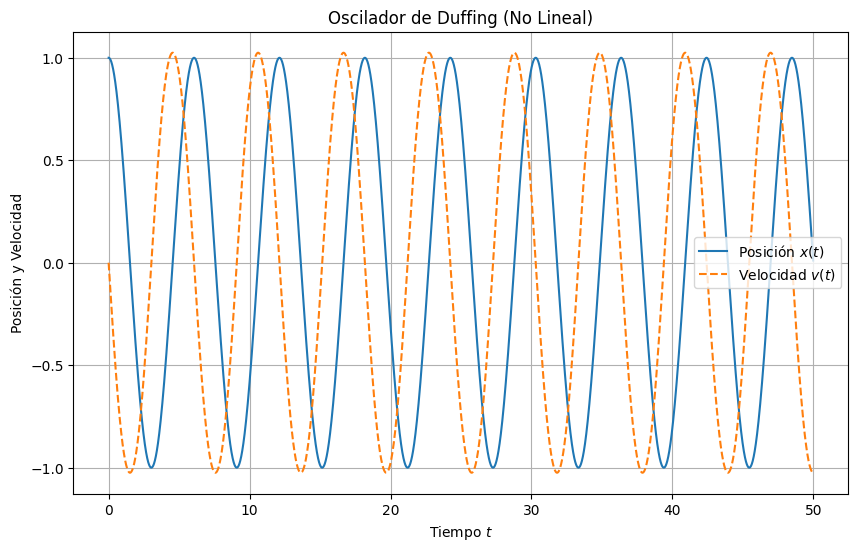

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las constantes
alpha = 1.0  # Constante de oscilación lineal
beta = 0.1   # Constante de no linealidad

# Definimos la función del sistema de ecuaciones
def duffing(t, y):
    x1, x2 = y
    dx1dt = x2
    dx2dt = -alpha * x1 - beta * x1**3
    return np.array([dx1dt, dx2dt])

# Método de Runge-Kutta de 4to orden
def runge_kutta_4(f, y0, t0, tf, dt):
    t_values = np.arange(t0, tf, dt)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(1, len(t_values)):
        t = t_values[i-1]
        y = y_values[i-1]

        k1 = f(t, y)
        k2 = f(t + dt/2, y + dt*k1/2)
        k3 = f(t + dt/2, y + dt*k2/2)
        k4 = f(t + dt, y + dt*k3)

        y_values[i] = y + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, y_values

# Condiciones iniciales
x0 = 1.0  # Posición inicial
v0 = 0.0  # Velocidad inicial
y0 = np.array([x0, v0])  # Estado inicial [x, v]
t0 = 0.0  # Tiempo inicial
tf = 50.0  # Tiempo final
dt = 0.01  # Paso de tiempo

# Resolver la ecuación de Duffing
t_values, y_values = runge_kutta_4(duffing, y0, t0, tf, dt)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values[:, 0], label='Posición $x(t)$')
plt.plot(t_values, y_values[:, 1], label='Velocidad $v(t)$', linestyle='--')
plt.xlabel('Tiempo $t$')
plt.ylabel('Posición y Velocidad')
plt.title('Oscilador de Duffing (No Lineal)')
plt.legend()
plt.grid(True)
plt.show()


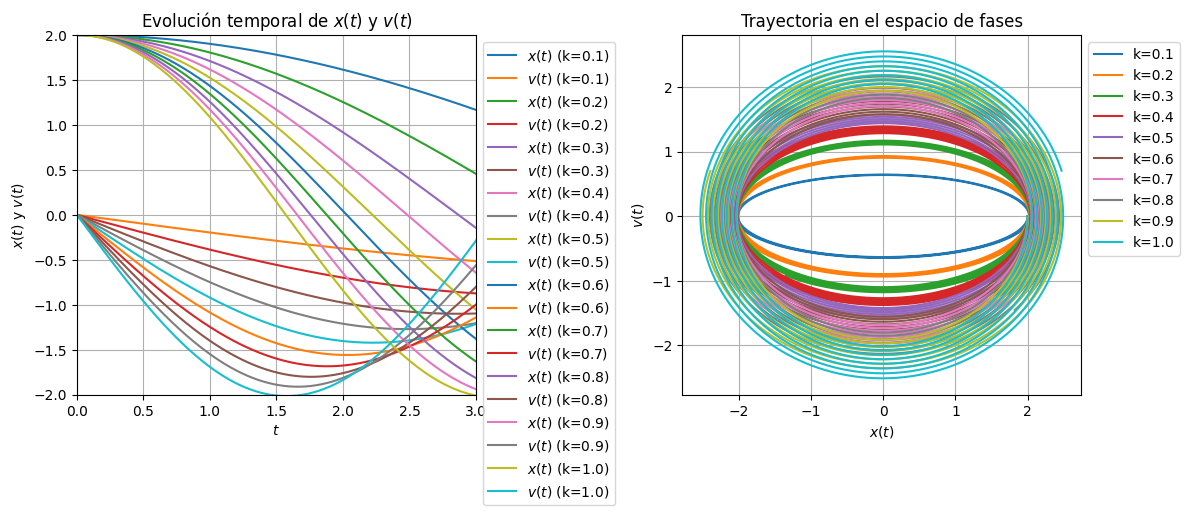

In [27]:
#Usando el programa, tomarán 10 valores de k, entre 0 y 1.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Ecuación del oscilador armónico simple
def harmonic_eq(x, t, k):
    return x[1], -k * x[0]

# Método de Euler para resolver el sistema
def euler_2var(x, func, t, k, dt):
    dx = func(x, t, k)
    return x[0] + dt * dx[0], x[1] + dt * dx[1]

# Cálculo y graficación
def calc_plot2var(method, equation, k, dt, n_steps, axes1, axes2):
    t = np.arange(0, n_steps * dt, dt)
    x = np.zeros((n_steps, 2))  # Inicializa posición y velocidad
    x[0][0] = 2.0  # Posición inicial
    x[0][1] = 0.0  # Velocidad inicial

    # Iteración para resolver la ecuación
    for i in range(n_steps - 1):
        x[i + 1] = method(x[i], harmonic_eq, t[i], k, dt)

    # Graficar la evolución temporal de posición y velocidad
    axes1.plot(t, x[:, 0], label=f"$x(t)$ (k={k:.1f})")
    axes1.plot(t, x[:, 1], label=f"$v(t)$ (k={k:.1f})")

    # Graficar la trayectoria en el espacio de fases (x vs v)
    axes2.plot(x[:, 0], x[:, 1], label=f"k={k:.1f}")

# Función principal para generar las gráficas
def plot_harmonic_oscillator():
    # Parámetros
    dt = 0.01
    n_steps = 5000

    # Crear figura con dos subgráficas
    fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(12, 5))

    # Bucle para diferentes valores de k
    for i in range(10):
        k = 0.1 * (i + 1)  # Valores de k entre 0.1 y 1.0
        calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps, axes1, axes2)

    # Configuración de la gráfica 1: evolución temporal
    axes1.set_title("Evolución temporal de $x(t)$ y $v(t)$")
    axes1.set_xlabel("$t$")
    axes1.set_ylabel("$x(t)$ y $v(t)$")
    axes1.legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes1.grid(True)

    # Configuración de la gráfica 2: espacio de fases
    axes2.set_title("Trayectoria en el espacio de fases")
    axes2.set_xlabel("$x(t)$")
    axes2.set_ylabel("$v(t)$")
    axes2.legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes2.grid(True)

    # Ajuste de límites para hacer zoom
    axes1.set_xlim(0, 3)
    axes1.set_ylim(-2, 2)

    # Ajuste de diseño para evitar solapamientos
    plt.tight_layout()
    plt.show()

# Ejecutar la función principal
if __name__ == "__main__":
    plot_harmonic_oscillator()


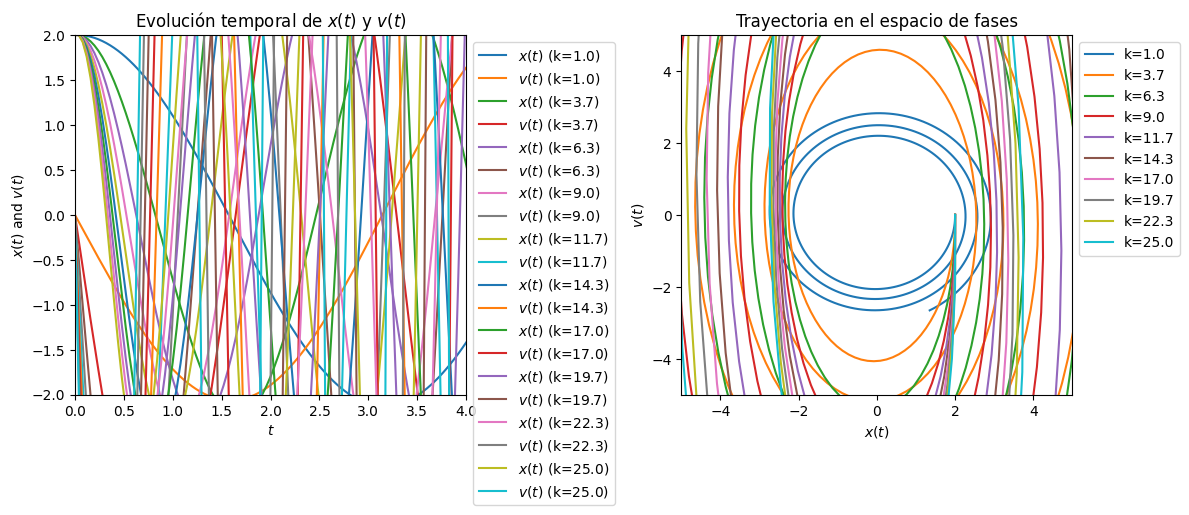

In [28]:
#Posteriormente 10 valores de k, entre 1 y 25.

def calc_plot2var(method, equation, k, dt, n_steps):
    t = np.arange(0, n_steps*dt, dt)
    x = np.zeros((n_steps,2))               # n_step
    x[0][0] = 2.0                           # initial position
    for i in range(n_steps-1):
        x[i+1] = method(x[i],harmonic_eq, t[i], k, dt)

    # Ejes de la primera gráfica (evolución temporal de la posición y la velocidad)
    axes1.plot(t, x[:,0], label=f"$x(t)$ (k={k:.1f})")
    axes1.plot(t, x[:,1], label=f"$v(t)$ (k={k:.1f})")

    # Ejes de la gráfica de la trayectoria
    axes2.plot(x[:,0], x[:,1], label=f"k={k:.1f}")

if __name__ == "__main__" :
    #Cambiar los tamaños de partición y el número de particiones
    dt = 0.04
    n_steps = 500

    fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(12, 5))

    k_start = 1
    k_end = 25
    n_partitions = 10
    k_values = np.linspace(k_start, k_end, n_partitions)

    for k in k_values:
        calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)

    # Primera gráfica
    axes1.set_title("Evolución temporal de $x(t)$ y $v(t)$")
    axes1.set_xlabel("$t$")
    axes1.set_ylabel("$x(t)$ and $v(t)$")
    axes1.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Segunda gráfica
    axes2.set_title("Trayectoria en el espacio de fases")
    axes2.set_xlabel("$x(t)$")
    axes2.set_ylabel("$v(t)$")
    axes2.legend(loc='upper left', bbox_to_anchor=(1, 1))

     # Acercando la vista modificando el rango de los ejes
    axes1.set_xlim(0, 4)
    axes1.set_ylim(-2, 2)

    axes2.set_xlim(-5, 5)
    axes2.set_ylim(-5, 5)

    plt.tight_layout()
    plt.show()

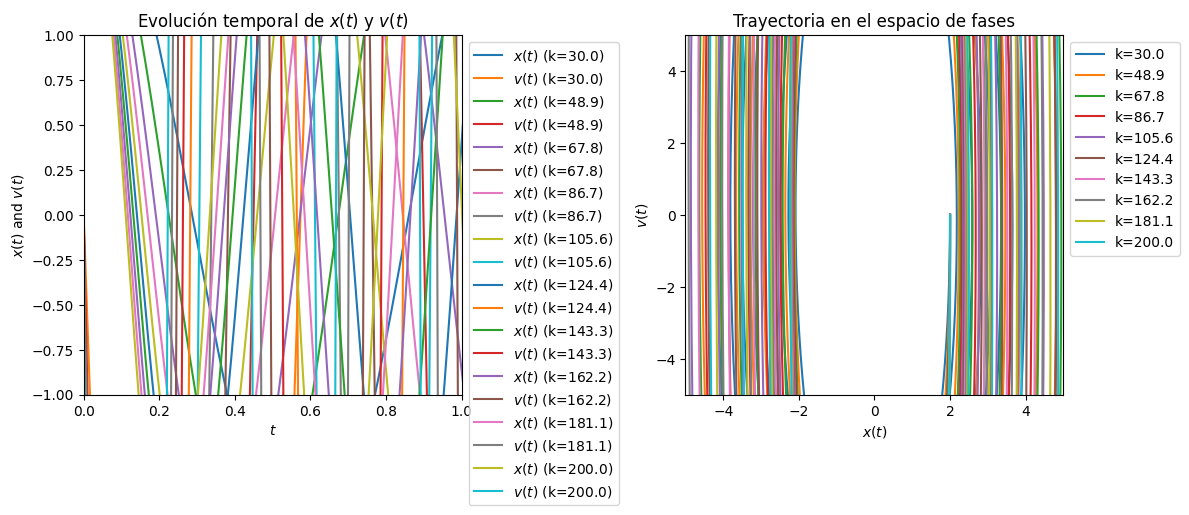

In [29]:
#10 valores de k, entre 30 y 200.

def calc_plot2var(method, equation, k, dt, n_steps):
    t = np.arange(0, n_steps*dt, dt)
    x = np.zeros((n_steps,2))               # n_step
    x[0][0] = 2.0                           # initial position
    for i in range(n_steps-1):
        x[i+1] = method(x[i],harmonic_eq, t[i], k, dt)

    # Ejes de la primera gráfica (evolución temporal de la posición y la velocidad)
    axes1.plot(t, x[:,0], label=f"$x(t)$ (k={k:.1f})")
    axes1.plot(t, x[:,1], label=f"$v(t)$ (k={k:.1f})")

    # Ejes de la gráfica de la trayectoria
    axes2.plot(x[:,0], x[:,1], label=f"k={k:.1f}")

if __name__ == "__main__" :
    #Cambiar los tamaños de partición y el número de particiones
    dt = 0.005
    n_steps = 2000

    fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(12, 5))

    k_start = 30
    k_end = 200
    n_partitions = 10
    k_values = np.linspace(k_start, k_end, n_partitions)

    for k in k_values:
        calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)
    # Primera gráfica
    axes1.set_title("Evolución temporal de $x(t)$ y $v(t)$")
    axes1.set_xlabel("$t$")
    axes1.set_ylabel("$x(t)$ and $v(t)$")
    axes1.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Segunda gráfica
    axes2.set_title("Trayectoria en el espacio de fases")
    axes2.set_xlabel("$x(t)$")
    axes2.set_ylabel("$v(t)$")
    axes2.legend(loc='upper left', bbox_to_anchor=(1, 1))

     # Acercando la vista modificando el rango de los ejes
    axes1.set_xlim(0, 1)
    axes1.set_ylim(-1, 1)

    axes2.set_xlim(-5, 5)
    axes2.set_ylim(-5, 5)

    plt.tight_layout()
    plt.show()

In [ ]:
#Fin